# Carga de datos
Utilizamos un conjunto de datos de alrededor de 37000 reseñas de videos de Amazon Instant Video y 1700000 reseñas de películas y programas de televisión, todas obtenidas del sitio web: http://jmcauley.ucsd.edu/data/amazon/. Tenga en cuenta que hay conjuntos de datos mucho más grandes disponibles en el mismo sitio. Podemos esperar resultados mejores y más consistentes en conjuntos de datos más grandes (como reseñas de libros). Tenga en cuenta que estos conjuntos de datos están comprimidos (gzip) y están en formato JSON, cada línea representa una revisión y cada línea es su propio objeto JSON.

## [NLTK](https://www.nltk.org/)

In [1]:
# ! pip install --user -U nltk

In [2]:
%%time
import gzip
import json
import string

import nltk # imports the natural language toolkit -- una libreria que nos sirve para hacer procesos de NLP
import pandas as pd
import plotly


# https://www.nltk.org/api/nltk.tokenize.punkt.html
nltk.download('punkt')

CPU times: user 1.14 s, sys: 122 ms, total: 1.26 s
Wall time: 1.16 s


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_uri_raw: str = "https://github.com/Andru-1987/csv_files_ds/raw/refs/heads/main/reviews_Amazon_Instant_Video_5.json.gz"
data_uri_movies: str = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Movies_and_TV_5.json.gz"

In [4]:
instant_video = pd.read_json(data_uri_raw, lines=True, compression='gzip')

In [5]:
len(instant_video)

37126

In [6]:
instant_video.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009"
5,A1POFVVXUZR3IQ,B000H00VBQ,Z Hayes,"[12, 12]",I discovered this series quite by accident. Ha...,5,I purchased the series via streaming and loved...,1318291200,"10 11, 2011"
6,A1PG2VV4W1WRPL,B000H0X79O,"Jimmy C. Saunders ""Papa Smurf""","[0, 0]","It beats watching a blank screen. However, I j...",3,It takes up your time.,1381795200,"10 15, 2013"
7,ATASGS8HZHGIB,B000H0X79O,JohnnyC,"[0, 0]","There are many episodes in this series, so I p...",3,A reasonable way to kill a few minutes,1388275200,"12 29, 2013"
8,A3RXD7Z44T9DHW,B000H0X79O,Kansas,"[0, 0]",This is the best of the best comedy Stand-up. ...,5,kansas001,1393372800,"02 26, 2014"
9,AUX8EUBNTHIIU,B000H0X79O,Louis V. Borsellino,"[0, 0]",Not bad. Didn't know any of the comedians but...,3,Entertaining Comedy,1396396800,"04 2, 2014"


In [7]:
%%time
# podemos decirle a pandas que nuestro archivo esta en formato gzip y realizara el proceso de descompresion 
# para esto usamos el atributo `lines=True` para indicar que cada linea en el archivo tiene su propio JSON object
#instant_video = pd.read_json("reviews_Amazon_Instant_Video_5.json.gz", lines=True, compression='gzip')
# ----------
# El archivo Películas y TV es muy grande. Si tienes problemas para cargarlo, puedes cargar solo los primeros
# 100,000 reseñas usando 'chunksize' (elimine el comentario de la línea con 'chunksize' y comente la línea
# después de lo que carga el archivo completo en `movies_tv`). Todo el análisis puede ser
# hecho de la misma manera utilizando solo el subconjunto de revisiones, pero algunos de los resultados pueden ser diferentes de los ejemplos.
# ----------
movies_tv = next(pd.read_json(data_uri_movies, lines=True, compression='gzip', chunksize=10_000))
movies_tv.sample(10)

CPU times: user 1.11 s, sys: 1.85 s, total: 2.95 s
Wall time: 4min 29s


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
6505,A16YCLRKOU0EV3,0767802624,Jacob Joseph,"[0, 0]",This movie is like Ghostbusters with aliens. I...,5,"Hilarious, original movie",1091059200,"07 29, 2004"
5692,A2GPLOLLE6BUDT,0767802519,Dave,"[0, 1]","""Fantastic Acting, Wonderful Story, Great Phot...",5,May Top the List of My Favorites,1358380800,"01 17, 2013"
2913,A346ZE66XLBEVR,0764006770,K. Williams,"[2, 15]","The acting is terrible in this movie, which I ...",2,Bad acting and bad directing,1209254400,"04 27, 2008"
8730,A219E71CJ4A4YQ,0767808460,"jazz man ""my cd""","[0, 0]",I bought this movie for a friend who loves thi...,4,Bonjour Tristesse,1399334400,"05 6, 2014"
8086,A3OEECMCM2T4KQ,0767805712,C. Middleton,"[2, 3]",Eugenics as a form of social control by govern...,5,Discrimination has now become a science...,1081123200,"04 5, 2004"
6166,A3W2G2BC7RJJC1,0767802578,John W. Matney,"[5, 12]",When Hollywood finally chooses to make a movie...,1,I wanted a different ending,1169683200,"01 25, 2007"
3229,A2J1MCBH5WF2N5,0767002652,dikstr,"[0, 0]",Not bad but clearly not as well done as the or...,3,Not bad,1373500800,"07 11, 2013"
4038,A1ENC0ALMHVBU,0767024427,"D. HupFons ""Hup234""","[6, 9]",This unique documentary clearly portrays some ...,2,Cockeyed Perspective Taints Provocative Subject,1113696000,"04 17, 2005"
1846,A2E1EFNIZL2FVA,0738920525,&#9899; RIZZO &#9899;,"[25, 25]","If anything, this 1999 Kickboxing Workout is a...",5,High-adrenaline physical Kickboxing Workout!!,1012176000,"01 28, 2002"
1075,A36PR99BSM8KQX,0310263662,Lizzy,"[2, 6]",...like being caught between your mortal being...,4,It's like being caught between two places...,1079308800,"03 15, 2004"


Miremos algunos de los atributos

* **reviewerID:** A unique ID to identify the author of the review.
* **asin:** The ["Amazon Standard Identification Number"](https://www.amazon.com/gp/seller/asin-upc-isbn-info.html) which provides more information about the exact product and version.
* **reviewerName:** The username chosen by the reviewer.
* **helpful:** A record of how many users indicated that the review was helpful/not helpful.
* **reviewText:** The full text of the review.
* **overall:** The overall rating (1-5) left by the reviewer.
* **summary:** A short version of the review, used as the title.
* **unixReviewTime:** The date that the review was created, in [Unix Epoch](https://en.wikipedia.org/wiki/Unix_time) format.
* **reviewTime:** A human readable date giving the day, month, and year.

## INFORMACION DE LA DATA

In [8]:
movies_tv['datetime'] = pd.to_datetime(movies_tv['reviewTime'], format="%m %d, %Y")
instant_video['datetime'] = pd.to_datetime(instant_video['reviewTime'], format="%m %d, %Y")

## CLEAN DATAFRAME

In [9]:
movies_tv = movies_tv.drop(columns = ['reviewerID', 'asin', 'reviewerName', 'reviewTime'])
instant_video = instant_video.drop(columns = ['reviewerID', 'asin', 'reviewerName', 'reviewTime'])

In [10]:
movies_tv.datetime.value_counts().head(20)

datetime
2004-02-25    21
2012-12-28    18
2013-06-05    17
2004-02-29    17
2004-02-27    16
2013-08-10    15
2013-04-17    15
2004-03-08    14
2014-01-01    14
2014-01-09    14
2014-07-08    14
2012-12-10    14
2013-06-08    13
2004-02-26    13
2004-02-28    12
2013-01-13    12
2014-01-06    12
2013-01-31    12
2013-04-09    12
2014-03-08    12
Name: count, dtype: int64

<Axes: >

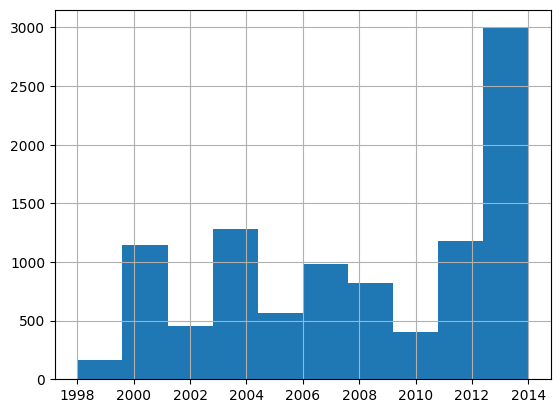

In [11]:
movies_tv.datetime.dt.year.hist()

array([[<Axes: title={'center': 'overall'}>,
        <Axes: title={'center': 'unixReviewTime'}>],
       [<Axes: title={'center': 'datetime'}>, <Axes: >]], dtype=object)

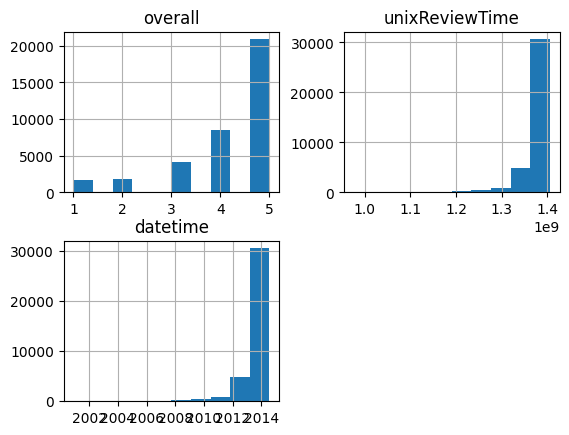

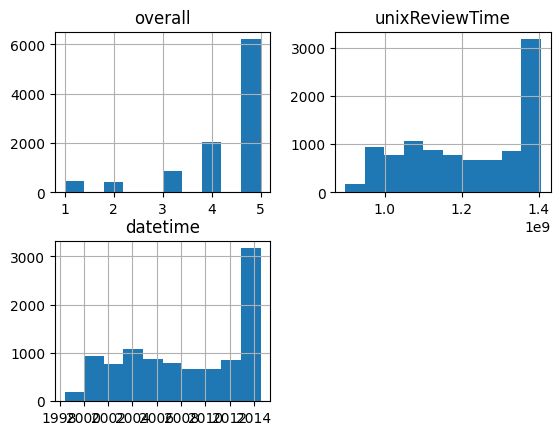

In [12]:
instant_video.hist()
movies_tv.hist()

Notamos eso:

1. La mayoría de las reseñas son buenas; de hecho, ¡más de la mitad son perfectas (5/5 estrellas) en ambos conjuntos de datos!
2. Casi todas las revisiones de videos instantáneos son extremadamente recientes. Será muy difícil detectar tendencias sin corregir esto. Las reseñas de TV Movie están sustancialmente más dispersas (aunque también incluyen un pico reciente).

In [13]:
instant_video['year'] = instant_video.datetime.dt.year
instant_video.groupby(['year']).agg({'overall': 'mean', 'year': 'count'})

,overall,year
year,,
2000,5.000000,1
2004,4.000000,1
2006,4.937500,16
2007,4.245763,118
2008,4.298701,231
2009,4.251381,362
2010,4.093085,376
2011,4.012414,725
2012,4.111845,2727


In [14]:
movies_tv['year'] = movies_tv.datetime.dt.year
movies_tv.groupby(['year']).agg({'overall': 'mean', 'year': 'count'})

,overall,year
year,,
1998,3.806452,31
1999,3.962121,132
2000,4.189233,613
2001,4.114878,531
2002,4.279736,454
2003,4.290237,379
2004,4.065702,898
2005,4.093640,566
2006,4.181176,425


# Promedio de ratings en el tiempo

In [15]:
result = instant_video.groupby(instant_video.datetime.dt.year).agg({'overall': 'mean', 'overall': 'count'})
result

,overall
datetime,
2000,1
2004,1
2006,16
2007,118
2008,231
2009,362
2010,376
2011,725
2012,2727


<Axes: xlabel='datetime'>

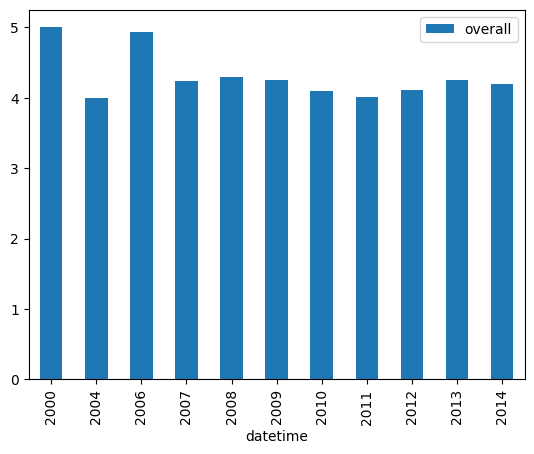

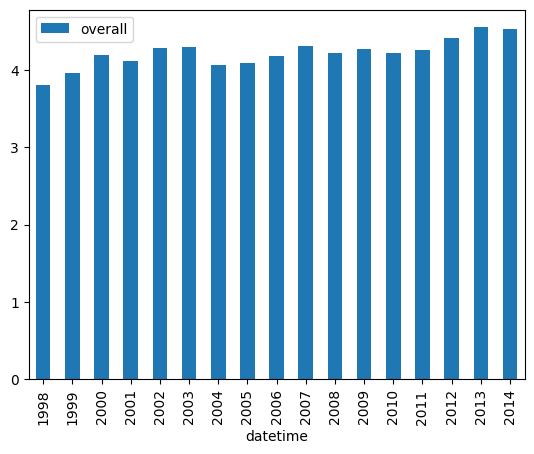

In [16]:
instant_video.groupby(instant_video.datetime.dt.year)['overall'].mean().to_frame().plot(kind="bar")
movies_tv.groupby(movies_tv.datetime.dt.year)['overall'].mean().to_frame().plot(kind="bar")

Notamos eso:

1. No hay tendencias notables de cambio de calificaciones con el tiempo.

2. Hay algunos años atípicos con calificaciones más altas, pero estos son años en los que la cantidad de revisiones es muy pequeña, lo que hace que el promedio sea menos confiable.

<Axes: xlabel='datetime'>

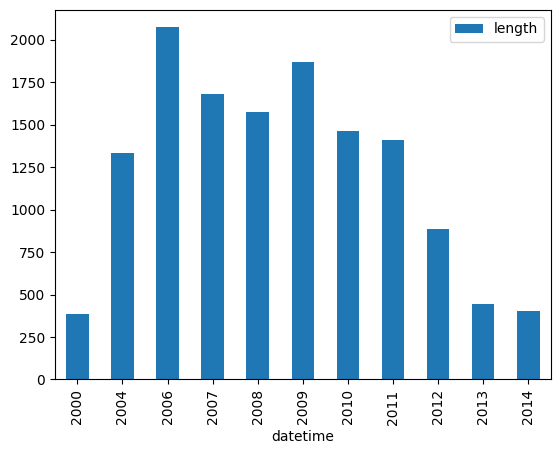

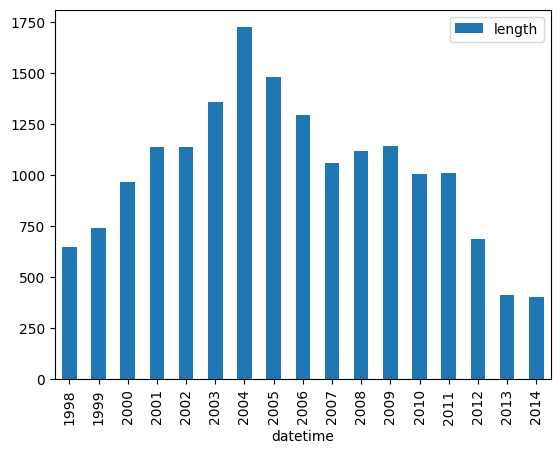

In [17]:
instant_video['length'] = instant_video['reviewText'].apply(len)
instant_video.groupby(instant_video.datetime.dt.year)['length'].mean().to_frame().plot(kind="bar")

movies_tv['length'] = movies_tv['reviewText'].apply(len)
movies_tv.groupby(movies_tv.datetime.dt.year)['length'].mean().to_frame().plot(kind="bar")

Observamos una aparente tendencia al alza en la duración de las reseñas durante la década de 1990 y principios de la de 2000, seguida de una tendencia a la baja. Debido a que ambos conjuntos de datos tienen revisiones más recientes, la tendencia a la baja en la duración de la revisión es más confiable.

# FRECUENCIA DE PALABRAS
Encontremos las diez palabras sin stopwrods que aparecen con mayor frecuencia en: (i) todas las reseñas, (ii) reseñas positivas, (iii) reseñas negativas. ¿Te sorprenden los resultados? ¿Por qué o por qué no?

In [18]:
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
def split_reviews(df, threshold):
    df_lower = df[df['overall'] < threshold].copy()
    df_upper = df[df['overall'] >= threshold].copy()

    return df_lower, df_upper

def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return words  # Return a list of words


def get_top_n_words(df, col, n):
    all_words = [word for review in df[col] for word in review]  # Ensure words are split correctly
    word_freq = Counter(all_words)
    table = pd.DataFrame(word_freq.most_common(n), columns=["word", "freq"])

    table.insert(0, 'Rank', range(1, len(table) + 1))
    return table

def plot_top_words(df, review):
    n = len(df)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='freq', y='word', hue = "word",data=df, palette="Blues_r")

    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.title(f"Top {n} Most Frequent Words: {review}", fontsize=12)
    plt.grid(axis='x', linestyle="--", alpha=0.5)
    plt.show()


In [20]:
movies_tv_chunk =  movies_tv.iloc[:100_000] 
movies_tv_chunk

,helpful,reviewText,overall,summary,unixReviewTime,datetime,year,length
0,"[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,1203984000,2008-02-26,2008,299
1,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,1388361600,2013-12-30,2013,122
2,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,1388361600,2013-12-30,2013,251
3,"[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,1202860800,2008-02-13,2008,153
4,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,1387670400,2013-12-22,2013,148
...,...,...,...,...,...,...,...,...
9995,"[0, 0]","Of course by now, most avid movier-goers have ...",5,ALL-TIME GREAT MOVIE - WW II,1316476800,2011-09-20,2011,722
9996,"[1, 1]",I used to really love this movie and I still h...,3,"In retrospect, not as great as I remembered",1385078400,2013-11-22,2013,1195
9997,"[5, 29]",A great movie in every way but the obvious. J...,3,"""I'm a Lot Drunker than You, so It Should be a...",1156032000,2006-08-20,2006,2683
9998,"[2, 3]",The crew of the USS Caine resents Captain Quee...,4,"""Ah but the strawberries - that's where I had ...",1087516800,2004-06-18,2004,1120


In [21]:
movies_tv_chunk['process_review'] = movies_tv_chunk["reviewText"].apply(preprocess_text)

/tmp/ipykernel_17261/1085026010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_tv_chunk['process_review'] = movies_tv_chunk["reviewText"].apply(preprocess_text)


In [32]:
bad_reviews, good_reviews = split_reviews(movies_tv_chunk, 1.1)

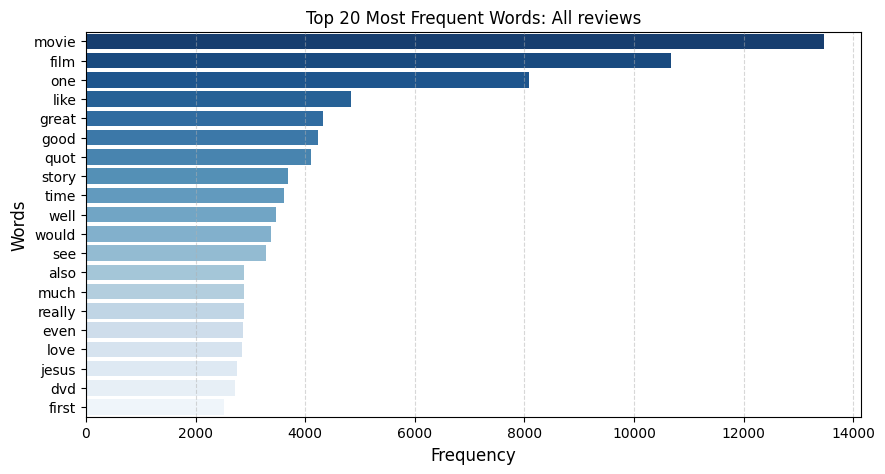

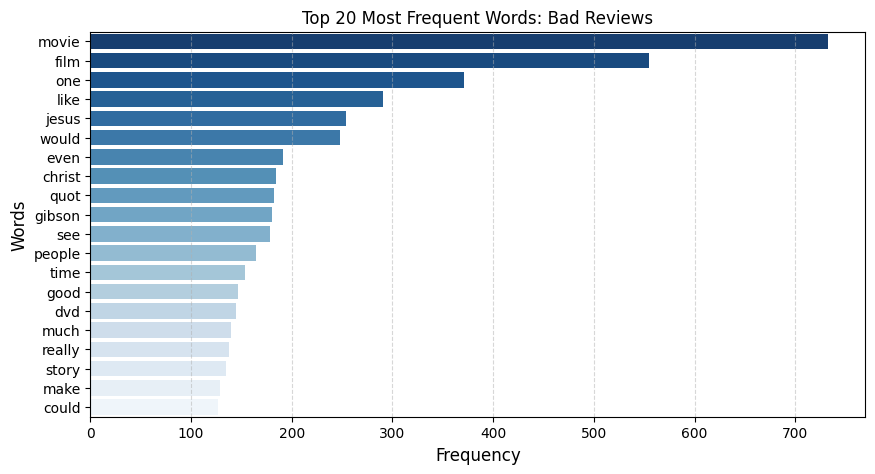

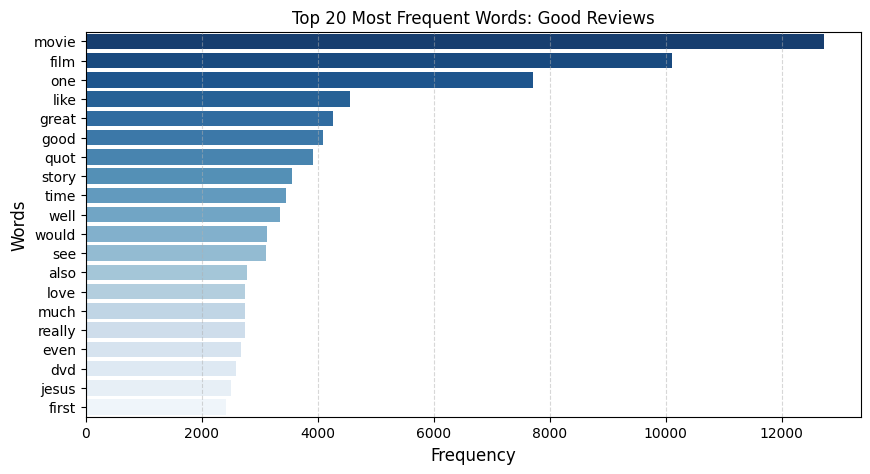

In [33]:
TOP = 20

for header, dataset in zip(["All reviews", "Bad Reviews","Good Reviews"],[movies_tv_chunk,bad_reviews,good_reviews]):
    reviews = get_top_n_words(dataset,"process_review", TOP)
    plot_top_words(reviews, header)